In [12]:
import numpy as np

data=np.load('C:\\Users\\kongkon\\Desktop\\data.npy')
target=np.load('C:\\Users\\kongkon\\Desktop\\target.npy')

#loading the save numpy arrays in the previous code

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 45s 46ms/step - loss: 0.6997 - accuracy: 0.5596 - val_loss: 0.6112 - val_accuracy: 0.6653
Epoch 2/20
990/990 [==============================] - 44s 44ms/step - loss: 0.5280 - accuracy: 0.7424 - val_loss: 0.4422 - val_accuracy: 0.8347
Epoch 3/20
990/990 [==============================] - 45s 45ms/step - loss: 0.4065 - accuracy: 0.8283 - val_loss: 0.4557 - val_accuracy: 0.8266
Epoch 4/20
990/990 [==============================] - 50s 50ms/step - loss: 0.2876 - accuracy: 0.8879 - val_loss: 0.3082 - val_accuracy: 0.8790
Epoch 5/20
990/990 [==============================] - 49s 49ms/step - loss: 0.1883 - accuracy: 0.9313 - val_loss: 0.3454 - val_accuracy: 0.8548
Epoch 6/20
990/990 [==============================] - 48s 48ms/step - loss: 0.1572 - accuracy: 0.9465 - val_loss: 0.2505 - val_accuracy: 0.9153
Epoch 7/20
990/990 [==============================] - 43s 43ms/step - loss: 0.1127 - accur

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

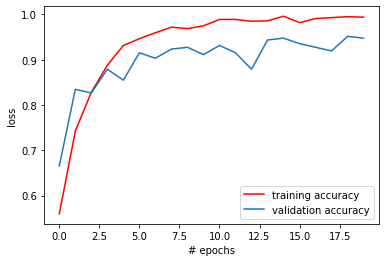

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 3s 23ms/step
[0.2018672832544299, 0.9202898740768433]
